# What is about ?

Introductoty notebook for the competition on LRX generators of the symmetric groups.

Here we will describe the longest and other long elements for these generators.

**LRX generators:** 

    L - left cyclic shift
    R - right cyclic shift
    X - swap of positions 0 and 1

**Long elements. Conjectures.**

The longest and other long elements can be described as products of transpositions or geometrically as symmetries of regular n-gon (mirror symmetr over diagonal) - see pictures and analysis below.

Conjecture 1: The longest is unique, its length is n(n-1)/2 it is product of transpositions (0,1)(2,n-1)(3,n-2)...

Conjecture 2: The other long elements has different lengths except there are pairs of them which can be obtained by swaping L and R in their decomposition. 

If we can prove  conjecture 2 we will improve lower bound on the diameter.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import time
t0start = time.time() 

import matplotlib.pyplot as plt
import seaborn as sns

# LRX permutations

In [2]:
n = 5
print('n=5', n)

def get_LRX_moves(n):
    L = np.array( list(np.arange(1,n)) + [0])
    R = np.array( [n-1] + list(np.arange(n-1)) )
    X = np.array( [1,0] + list(np.arange(2,n)) )
    return L,R,X
L,R,X = get_LRX_moves(n)
print('L,R,X:')
print(L,R,X)

n=5 5
L,R,X:
[1 2 3 4 0] [4 0 1 2 3] [1 0 2 3 4]


# The longest element (conjecturally)

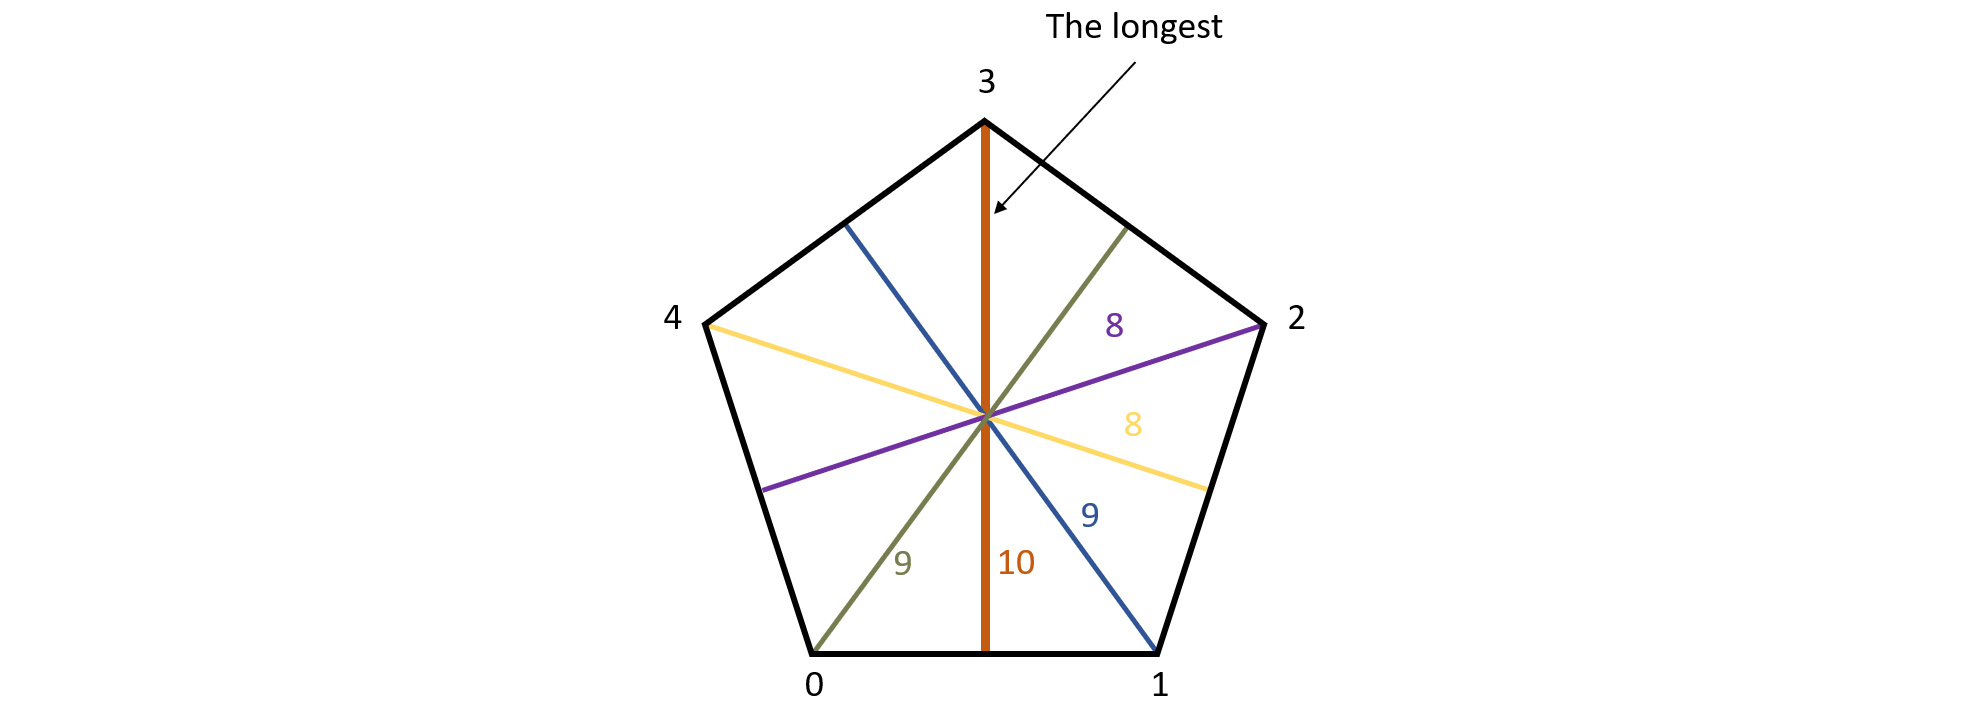

n(n-1)/2  is its length

**Geometric description** - conisder Regular n-polygon numerate nodes by 0...n-1. Consider mirror symmetries by the axis going throw the center - there are n such symmetries. One of them - that exchanges 0 and 1 - is the longest. The other are also quite long - longer than nˆ2/2-n-1. (See F.Pertrov argument below).  

**Algebraic description:** 

    It is product of transpositions
    (0,1)(2,n-1)(3,n-2)(4,n-3)...(1+i,n-i)...
    
    For n = 2k+1
    (0,1)(2,n-1)(3,n-2)(4,n-3)...(1+i,n-i)...(k,k+2) 
    
    Example n = 5, k = 2
    (0,1)(2,4)
    
    For n = 2k
    (0,1)(2,n-1)(3,n-2)(4,n-3)...(1+i,n-i)...(k,k+1) 
    
    Example n = 4, k = 2
    (0,1)(2,3)


**Code description** is below

In [3]:
%%time 
n = 5
def get_longest(n):
    p = np.arange(n)
    # Обмен (1,2)
    p[0], p[1] = p[1], p[0]
    i = 2
    while i < n-i+1:
        #print(i, n-i+1)
        p[i], p[n-i+1] = p[n-i+1], p[i]
        i += 1
    return p
p = get_longest(n)
print(p)

[1 0 4 3 2]
CPU times: user 497 µs, sys: 0 ns, total: 497 µs
Wall time: 495 µs


# Long element - full inversion - https://oeis.org/A186752

    Lengths from OEIS: 
    n = 1, 2, 3, 4, 5, 6,  7,  8,  9,  10, 11, 12, 13
    len 0, 1, 2, 4, 8, 13, 19, 26, 34, 43, 53, 64, 76

That element is quite long, but not the longest one.

It is actually different by two L (left cyclic shifts) from the longest.



In [4]:
%%time
n = 5
def get_full_inversion(n):
    p = np.arange(n)
    for i in range(n):
        p[i] = n-i-1
    return p
p = get_full_inversion(n)    
print(p)

[4 3 2 1 0]
CPU times: user 427 µs, sys: 0 ns, total: 427 µs
Wall time: 474 µs


## Look on the lenght difference - the longest vs. the full inversion

In [5]:
print('Difference with the diameter n(n-1)/2: ')
# https://oeis.org/A186752
list_n = [1, 2, 3, 4, 5, 6,  7,  8,  9,  10, 11, 12, 13]
list_len =  [0, 1, 2, 4, 8, 13, 19, 26, 34, 43, 53, 64, 76]
for i in range(len(list_n)):
    k = list_n[i]
    l = list_len[i]
    d = l - k*(k-1)/2 
    print('n=',k,'difference=', d)

Difference with the diameter n(n-1)/2: 
n= 1 difference= 0.0
n= 2 difference= 0.0
n= 3 difference= -1.0
n= 4 difference= -2.0
n= 5 difference= -2.0
n= 6 difference= -2.0
n= 7 difference= -2.0
n= 8 difference= -2.0
n= 9 difference= -2.0
n= 10 difference= -2.0
n= 11 difference= -2.0
n= 12 difference= -2.0
n= 13 difference= -2.0


## One needs LL to transfrom the longest to the full inversion

In [6]:
n = 5
print('n=',n)
p_longest = get_longest(n)
p_full_inversion = get_full_inversion(n)
print('The longest:', p_longest)
print('The full inversion:', p_full_inversion)


list_names = ['L','R','X']
L,R,X = get_LRX_moves(n)
for i1, m1 in enumerate([L,R,X]):
    for i2,m2 in enumerate([L,R,X]):
        m1,m2 = np.asarray(m1), np.asarray(m2)
        make_two_moves = p_longest[m1][m2]
        if np.all(make_two_moves == p_full_inversion):
            print('Two moves found from the longest to the full inversion:',list_names[i1],list_names[i2] )
        

n= 5
The longest: [1 0 4 3 2]
The full inversion: [4 3 2 1 0]
Two moves found from the longest to the full inversion: L L


# F.Petrov's "n" long elements - n-gon symmetries

![LRX long elements n=5](https://imgur.com/a/kdZiGkR)

n=5 https://imgur.com/a/kdZiGkR

n=4 https://imgur.com/a/T21Rsd2

![LRX long elements n=4](https://imgur.com/a/T21Rsd2)


https://t.me/c/1786836087/1526

Fedor Petrov: 

Оценку я так имел в виду доказывать. Пусть циклический порядок полностью сменился. Скажем, что два числа друзья, если их переставляли нечётное число раз. Тогда в каждом треугольнике нечётное число пар друзей, раз у него сменилась ориентация. Значит, если А - множество друзей элемента 1, то они и 1 между собой друзья, остальные между собой тоже друзья,а больше друзей нет. Того не-друзей максимум n^2/4. Значит, транспозиций было минимум n(n-1)/2-n^2/4, а между каждыми двумя транспозициями был поворот. Итого хотя бы n^2/2-n-1 операция.


Argument in generalization of Remark 2 page 4 "Small-diameter Cayley Graphs for Finite Simple Groups" L. BABAI, W . M . KANTOR, A . LUBOTSKY https://pages.uoregon.edu/kantor/PAPERS/BKL.pdf estimates length of that element as O(n*n).

It gives not only bound on length but more precise information bounding number of "X" in decomposition. 




In [7]:
%%time
n = 5

def get_n_long_permutations(n):
    list_long_permutations = []
    k = int(n/2)
    if n == 2*k + 1: # For odd "n"
        list_long_permutations = []
        for element_index in range(n): # numeration of long permutations by the pair of elements 
            # The symmetry for axis orthogonal to diagonal passing through the middle of element_index,element_index+1 edge of n-gon
            p = np.arange(n)
            #p[element_index],p[element_index+1] = p[element_index+1],p[element_index] # 
            for i in range(k):
                p[element_index-i],p[(element_index+1+i)%n] = p[(element_index+1+i)%n],p[element_index-i]
            list_long_permutations.append(p)
    else:
        # First generete permutations corresponding to symmetries NOT passing by edges of n-gon - only orthogoanl to "edges"
        # E.g. n=4, k = 2 
        # (0,1)(2,3) and (0,3)(1,2)
        for element_index in range(int(n/2)): 
            # The symmetry for axis orthogonal to diagonal passing through the middle of element_index,element_index+1 edge of n-gon
            p = np.arange(n)
            #p[element_index],p[element_index+1] = p[element_index+1],p[element_index] # 
            for i in range(k):
                p[element_index-i],p[(element_index+1+i)%n] = p[(element_index+1+i)%n],p[element_index-i]
            list_long_permutations.append(p)
        # Second generate those which correspond to diagonal passing through the nodes (element_index)
        for element_index in range(int(n/2)): 
            p = np.arange(n)
            #p[element_index],p[element_index+1] = p[element_index+1],p[element_index] # 
            for i in range(1,k+1):
                p[element_index-i],p[(element_index+i)%n] = p[(element_index+i)%n],p[element_index-i]
            list_long_permutations.append(p)    
            
    return list_long_permutations
    
list_long_permutations = get_n_long_permutations(n)    
for i in range(len(list_long_permutations)):
    print(i,list_long_permutations[i])

0 [1 0 4 3 2]
1 [3 2 1 0 4]
2 [0 4 3 2 1]
3 [2 1 0 4 3]
4 [4 3 2 1 0]
CPU times: user 1.51 ms, sys: 41 µs, total: 1.55 ms
Wall time: 1.33 ms


## Analysis of moves to transform one long to another 

In [8]:
%%time
for I1 in range(1, len(list_long_permutations )):
    p1 = list_long_permutations[0]
    p2 = list_long_permutations[I1]
    print(0,'p1:',p1)
    print(I1,'p2:',p2)
    id_perm = np.arange(n)
    list_names = ['Id', 'L','R','X']
    L,R,X = get_LRX_moves(n)
    for i1, m1 in enumerate([id_perm,L,R,X]):
        for i2,m2 in enumerate([id_perm, L,R,X]):
            m1,m2 = np.asarray(m1), np.asarray(m2)
            p_new  = p1[m1][m2]
            if np.all(p_new == p2):
                print('Two moves found from the p1 to p2:',list_names[i1],list_names[i2] )
    print()

0 p1: [1 0 4 3 2]
1 p2: [3 2 1 0 4]
Two moves found from the p1 to p2: R R

0 p1: [1 0 4 3 2]
2 p2: [0 4 3 2 1]
Two moves found from the p1 to p2: Id L
Two moves found from the p1 to p2: L Id

0 p1: [1 0 4 3 2]
3 p2: [2 1 0 4 3]
Two moves found from the p1 to p2: Id R
Two moves found from the p1 to p2: R Id

0 p1: [1 0 4 3 2]
4 p2: [4 3 2 1 0]
Two moves found from the p1 to p2: L L

CPU times: user 7.98 ms, sys: 3.03 ms, total: 11 ms
Wall time: 8.89 ms


# Simple BFS

Simple BFS construction of all states for the Cayley graph. 

Check what are the distances to selected long permutations.


In [9]:
%%time
n = 10
print('n=',n)
v0 = np.arange(n)
list_names = [ 'L','R','X']
L,R,X = get_LRX_moves(n)
list_moves = [L,R,X]
all_states = np.array( [ v0 ])
set_all_states = set(); set_all_states.add(str(v0) ) # Check  state is new or already visited
list_distances = [0]

list_long_permutations = get_n_long_permutations(n)    
list_check_permutations = [ str(p ) for p in list_long_permutations  ] 

for i_distance in range(1, int( n*(n-1)/2)+1 ): # distance (number of steps) from start
    new_states_sphere = [] # new states found on the currect level 
    for move in list_moves :
        for ix_state in range(all_states.shape[0] ):
            new_state = all_states[ix_state,:][move]
            if str(new_state) not in set_all_states: # Check is state is new of visite before
                set_all_states.add(str(new_state))
                new_states_sphere.append(new_state)
                list_distances.append(i_distance)
                
                if str(new_state) in list_check_permutations:
                    print('Distance:', i_distance,'Found long permutaion N:', list_check_permutations.index( str(new_state))  )

    if len(new_states_sphere) == 0: break
    all_states = np.vstack( (all_states, np.asarray(new_states_sphere) ) )
print('list_distances:')
print(str(list_distances)[:100])
print('Growth:')
print(pd.Series(list_distances).value_counts().sort_index() )

n= 10
Distance: 40 Found long permutaion N: 8
Distance: 41 Found long permutaion N: 2
Distance: 41 Found long permutaion N: 3
Distance: 42 Found long permutaion N: 7
Distance: 42 Found long permutaion N: 9
Distance: 43 Found long permutaion N: 1
Distance: 43 Found long permutaion N: 4
Distance: 44 Found long permutaion N: 6
Distance: 44 Found long permutaion N: 5
Distance: 45 Found long permutaion N: 0
list_distances:
[0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 
Growth:
0          1
1          3
2          6
3         12
4         24
5         47
6         87
7        161
8        297
9        528
10       927
11      1611
12      2726
13      4492
14      7184
15     11109
16     16751
17     24624
18     35105
19     48718
20     66154
21     87373
22    111996
23    140388
24    171657
25    204213
26    236429
27    266276
28    291271
29    308831
30    316158
31    310824
32    290837
33    254374
34    199563
35    129134
3

## a bit slower BFS - pure numpy no sets 

In [10]:
%%time
n = 5
v0 = np.arange(n)
list_names = [ 'L','R','X']
L,R,X = get_LRX_moves(n)
list_moves = [L,R,X]
all_states = np.array( [ v0 ])
list_distances = [0]
for i_step in range(1, int( n*(n-1)/2)+1 ):
    new_states_sphere = np.zeros( shape = (0,all_states.shape[1] ) )
    for move in list_moves :
        for ix_state in range(all_states.shape[0] ):
            new_state = all_states[ix_state,:][move]
            is_present = np.any(np.all(all_states == new_state, axis=1))
            is_present = is_present or np.any(np.all(new_states_sphere == new_state, axis=1))
            if not is_present:
                new_states_sphere = np.vstack( (new_states_sphere, new_state) )
                list_distances.append(i_step)
    if len(new_states_sphere) == 0: break
    all_states = np.vstack( (all_states,  new_states_sphere ) )
print('list_distances:')
print(str(list_distances)[:100])
print('Growth:')
print(pd.Series(list_distances).value_counts().sort_index() )


list_distances:
[0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 
Growth:
0      1
1      3
2      6
3     10
4     16
5     24
6     29
7     21
8      6
9      3
10     1
Name: count, dtype: int64
CPU times: user 46.4 ms, sys: 2 ms, total: 48.4 ms
Wall time: 46.3 ms


# Final timing

In [11]:
print('%.1f seconds passed total '%(time.time()-t0start) )
print('%.1f minutes passed total '%( (time.time()-t0start)/60)  )
print('%.2f hours passed total '%( (time.time()-t0start)/3600)  )

8270.9 seconds passed total 
137.8 minutes passed total 
2.30 hours passed total 
